In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, davies_bouldin_score
import scipy.cluster.hierarchy as sch

In [2]:
# Load datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
# Merge transactions with customers to get customer profile information
merged_data = transactions.merge(customers, on='CustomerID')
# Aggregate transaction data to get total spending and frequency of purchases per customer
customer_profile = merged_data.groupby(['CustomerID', 'CustomerName', 'Region']).agg({
    'TotalValue': 'sum',
    'TransactionID': 'count'
}).reset_index()
# Rename columns for clarity
customer_profile.rename(columns={'TransactionID': 'PurchaseFrequency', 'TotalValue': 'TotalSpending'}, inplace=True)

In [4]:
# Feature selection and scaling
features = customer_profile[['TotalSpending', 'PurchaseFrequency']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [5]:
# Function to evaluate clustering results
def evaluate_clustering(labels):
    db_index = davies_bouldin_score(scaled_features, labels)
    silhouette_avg = silhouette_score(scaled_features, labels)
    return db_index, silhouette_avg

In [6]:
optimal_k =2
# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
customer_profile['Hierarchical_Cluster'] = hierarchical.fit_predict(scaled_features)
# Evaluate Hierarchical Clustering
hierarchical_db_index, hierarchical_silhouette = evaluate_clustering(customer_profile['Hierarchical_Cluster'])
print(f"Hierarchical: DB Index: {hierarchical_db_index:.4f}, Silhouette Score: {hierarchical_silhouette:.4f}")

Hierarchical: DB Index: 0.6428, Silhouette Score: 0.4748


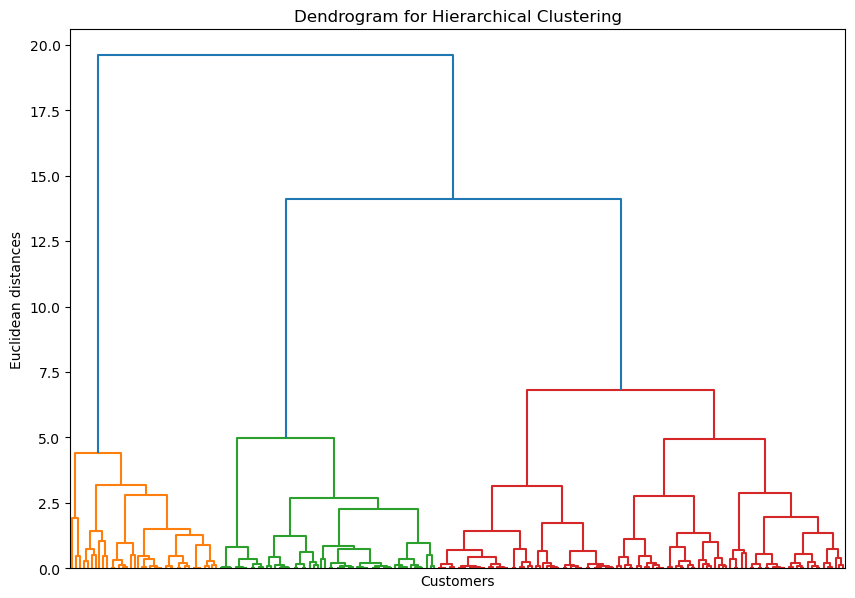

In [7]:
# Dendrogram visualization for Hierarchical Clustering
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method='ward'), leaf_rotation=90)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.xticks([])  # Remove x-ticks for clarity
plt.show()

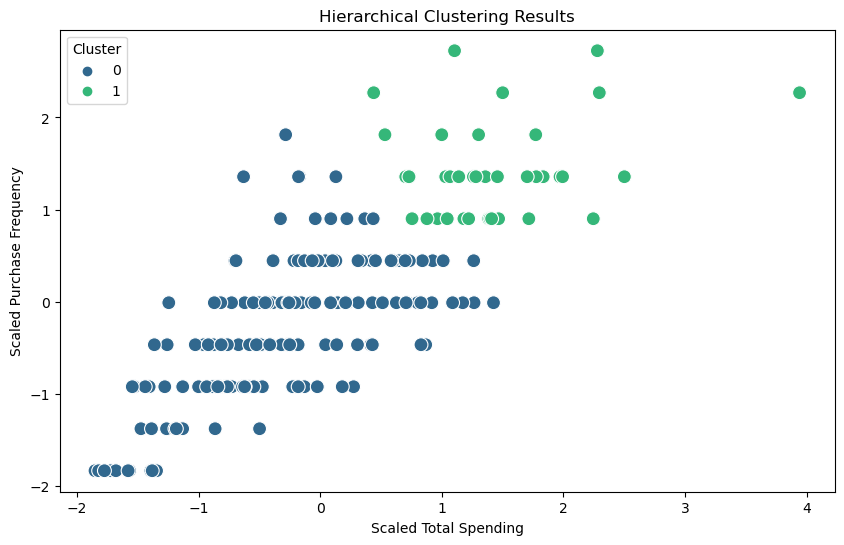

In [8]:
# Visualize Hierarchical Clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=customer_profile['Hierarchical_Cluster'], palette='viridis', s=100)
plt.title('Hierarchical Clustering Results')
plt.xlabel('Scaled Total Spending')
plt.ylabel('Scaled Purchase Frequency')
plt.legend(title='Cluster')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


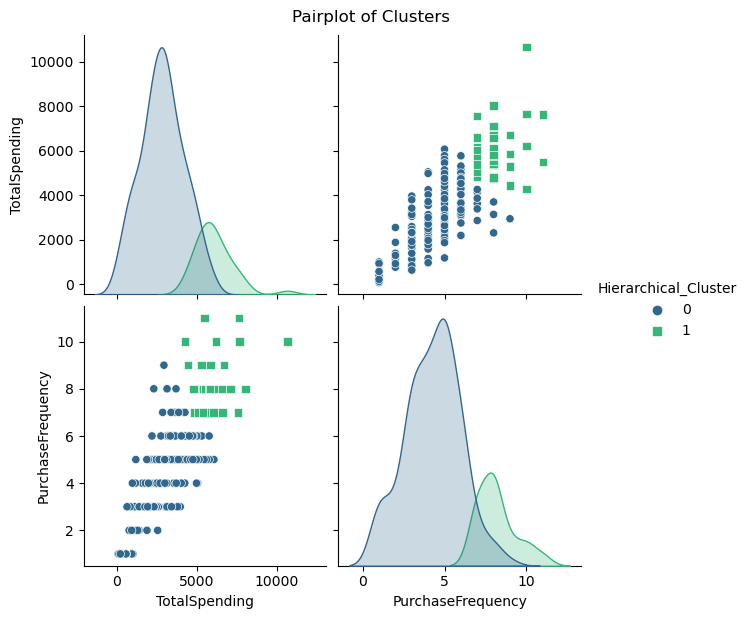

In [9]:
# Pairplot to visualize clusters
sns.pairplot(customer_profile, vars=['TotalSpending', 'PurchaseFrequency'], hue='Hierarchical_Cluster', palette='viridis', markers=['o', 's'], height=3)
plt.suptitle('Pairplot of Clusters', y=1.02)
plt.show()


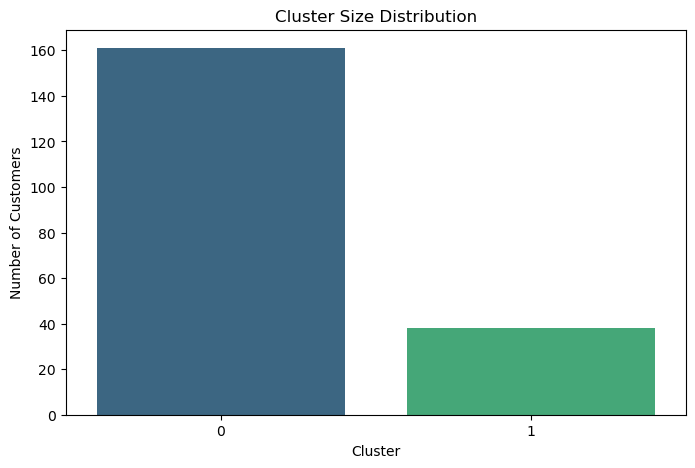

In [10]:
# Cluster size visualization
cluster_sizes = customer_profile['Hierarchical_Cluster'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values, palette='viridis')
plt.title('Cluster Size Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(ticks=cluster_sizes.index)
plt.show()

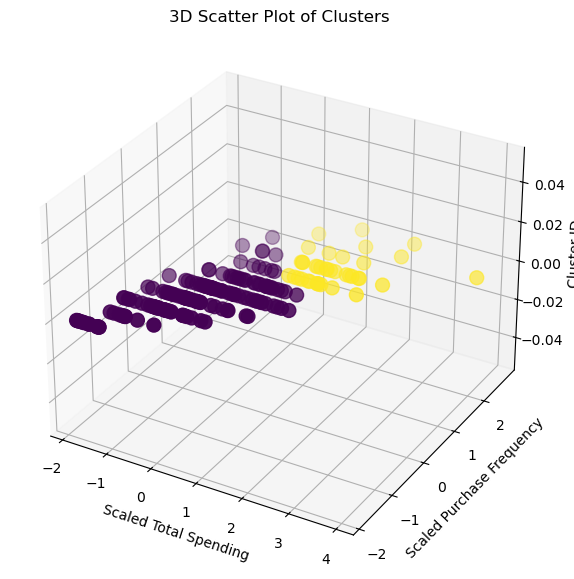

In [11]:
from mpl_toolkits.mplot3d import Axes3D
# 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_features[:, 0], scaled_features[:, 1], c=customer_profile['Hierarchical_Cluster'], cmap='viridis', s=100)
ax.set_title('3D Scatter Plot of Clusters')
ax.set_xlabel('Scaled Total Spending')
ax.set_ylabel('Scaled Purchase Frequency')
ax.set_zlabel('Cluster ID')
plt.show()

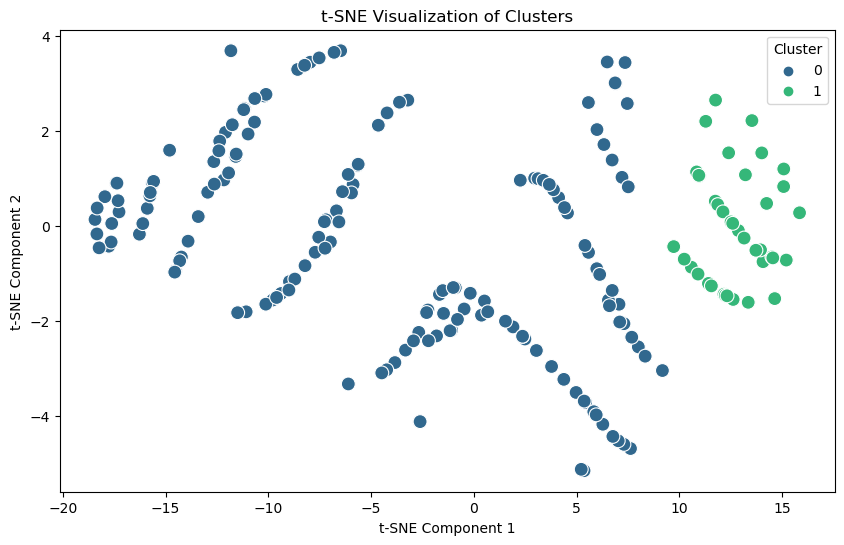

In [12]:
from sklearn.manifold import TSNE

# Apply t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_features)

# Scatter plot of t-SNE results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=customer_profile['Hierarchical_Cluster'], palette='viridis', s=100)
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.show()

In [13]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


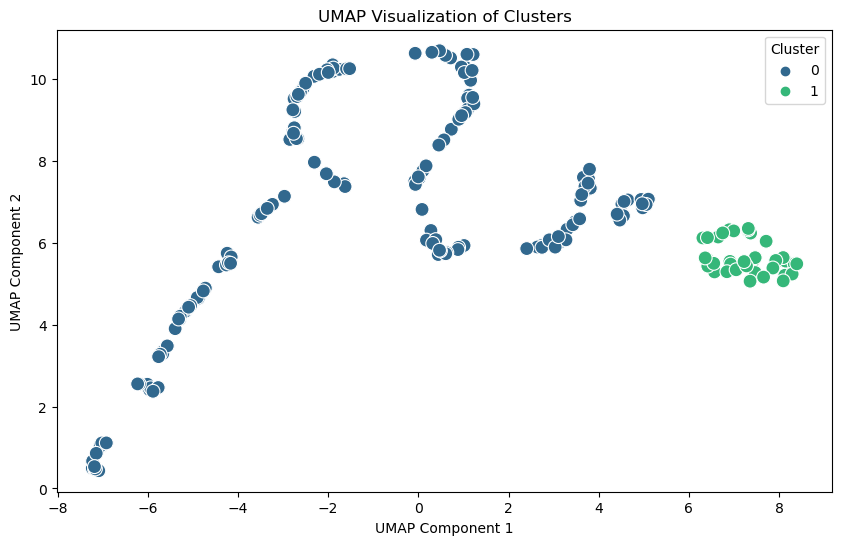

In [14]:
import umap
# Apply UMAP to reduce dimensions to 2D
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_results = umap_model.fit_transform(scaled_features)
# Scatter plot of UMAP results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=umap_results[:, 0], y=umap_results[:, 1], hue=customer_profile['Hierarchical_Cluster'], palette='viridis', s=100)
plt.title('UMAP Visualization of Clusters')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.show()